In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook

## Thinking outside the plane

Create non-linear decision boundaries by...
- Transforming data into a higher dimension
- Finding a good hyperplane boundary in the higher dimension
- Transform result back to starting data

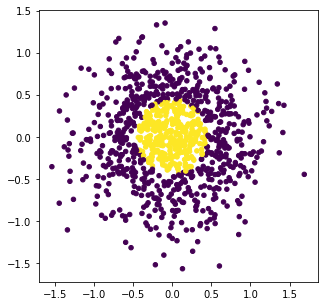

In [2]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

#create circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s=20)

- Straight line boundary won't work here
- Want a circular boundary
- Transform data into three dimensions by adding a new feature: $x^2+y^2$

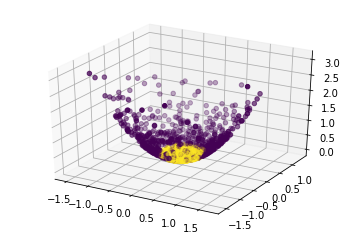

In [3]:
from mpl_toolkits.mplot3d import Axes3D

#make new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

AttributeError: 'float' object has no attribute 'ndim'

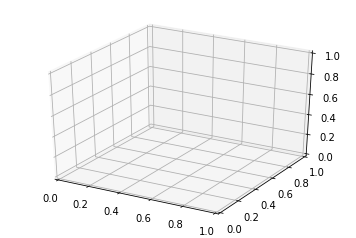

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
ax.plot_surface(xx, yy, .2, color='k', alpha=.5)
ax.hold(True)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

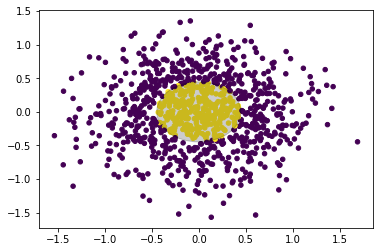

In [6]:
circle1 = plt.Circle((0,0), np.sqrt(.2), color='k', alpha=.2)
fig, ax = plt.subplots()
ax.scatter(data['x'], data['y'], c=data['d'], s=20)
ax.add_artist(circle1)

## Kernels and the 'kernel trick'
In practice, you won't have the computational resources to do this transformation. Knowing how many dimensions you'll need is not a simple calculation, and for real data you'll most likely want to run SVM with a very large number of features leading to a very high dimensional space. This requires a lot of resources than you practically have at your disposal, making this impractical when working with real data.

__Kernel trick:__ process SVM uses to find the optimal hyperplane of a higher dimensional space without actually transforming data into that space
- Kernel in this context does not refer to your computer's kernel linking hardware and OS
- In this context, __kernel functions__ are a way of mapping data to a space using weights
- __Kernel smoothing:__ generating a smoothed curve from a series of observations instead of plotting each one individually

### Kernels in SVM
- Kernal is a function that computes how similar two vectors are by computing their dot product
- Dot product is all that's necessary to find optimal hyperplane in higher dimensional space
- Default kernel in SKLearn is __radial basis function__, uses Gaussian decay according to distance from original point 